In [44]:
base = '/home3/ebrahim/what-is-brainscore/'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import numpy as np
base = '/home2/ebrahim/beyond-brainscore/'
from matplotlib import pyplot as plt
import os
from sklearn.metrics import mean_squared_error
import sys
sys.path.append('/home2/ebrahim/beyond-brainscore/')
from helper_funcs import find_best_layer
from plotting_functions import plot_across_subjects, plot_test_perf_across_layers, save_fMRI_simple, pass_info_plot_hist2d, find_rows_without_nan
from trained_results_funcs import create_pd_selected_models, find_best, max_across_selected_models
from trained_untrained_results_funcs import max_across_nested
from scipy.stats import pearsonr
import seaborn as sns
import pandas as pd
import matplotlib
from scipy.stats import ttest_rel, ttest_1samp
import nibabel as nib
from nilearn import plotting
from nilearn import surface
from nilearn import datasets
import plotly
import brainio

In [46]:
data_path = '/data/LLMs/data_processed/pereira/dataset/'
llm_acts_path = '/data/LLMs/data_processed/pereira/LLM_acts/'
results_path = '/data/LLMs/brainscore/results_pereira/trained/'
general_res_path = '/data/LLMs/brainscore/results_pereira/'
figurePath = '/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/figures/pereira_trained_updated/'
N = 10
exp = ['243', '384']
br_labels_dict = {}
num_vox_dict = {}
ytest_dict = {}
mse_intercept_dict = {}
subjects_dict = {}
for e in exp:
    bre = np.load(f'{data_path}networks_{e}.npy', allow_pickle=True)
    br_labels_dict[e] = bre
    num_vox_dict[e] = bre.shape[0]
    mse_intercept_dict[e] = np.load(f'{general_res_path}mse_intercept_{e}.npy')
    ytest_dict[e] = np.load(f'{general_res_path}y_test_ordered_{e}.npy')
    subjects_dict[e] = np.load(f"{data_path}/subjects_{e}.npy", allow_pickle=True)

In [34]:
pearson_r = True
sp_str = '-sp'
if pearson_r:
    metric = 'r'
    clip_zero=False
else:
    metric = 'r2'
    clip_zero=True
    
all_models_results_384 = np.load(f"{results_path}{metric}_384_trained{sp_str}.npy")
all_models_results_243 = np.load(f"{results_path}{metric}_243_trained{sp_str}.npy")
model_names = np.load(f"{results_path}{metric}_384_trained_model_names.npy")

model_name_upper = 'GPT2-XL'

In [35]:
SP_SL_word_vc_384 = max_across_selected_models(all_models_results_384, model_names, ['SENSE', 'SYNT', model_name_upper], '',  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='384', updated_model_name='SP+SL+WORD')
SP_SL_word_LLM_vc_384 = max_across_selected_models(all_models_results_384, model_names, ['SENSE', 'SYNT'], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='384', updated_model_name=f'SP+SL+WORD+{model_name_upper}')

SP_SL_word_vc_243 = max_across_selected_models(all_models_results_243, model_names, ['SENSE', 'SYNT', model_name_upper], '',  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='243', updated_model_name='SP+SL+WORD')
SP_SL_word_LLM_vc_243 = max_across_selected_models(all_models_results_243, model_names, ['SENSE', 'SYNT'], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='243', updated_model_name=f'SP+SL+WORD+{model_name_upper}')


LLM_vc_384 = max_across_selected_models(all_models_results_384, model_names, ['SP+SL', 'WORD', 'SENSE', 'SYNT'], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='384', updated_model_name=f'{model_name_upper}')

LLM_vc_243 = max_across_selected_models(all_models_results_243, model_names, ['SP+SL', 'WORD', 'SENSE', 'SYNT'], model_name_upper,  
                                num_vox_dict, br_labels_dict, subjects_dict, exp='243', updated_model_name=f'{model_name_upper}')


0.1542795460659728
0.17567932678748174
0.2018097743012293
0.21101520971074614
0.16602014878868673
0.1908015357403563


In [37]:
default_palette = sns.color_palette("deep")

In [38]:
modified_384 = pd.concat((SP_SL_word_vc_384, SP_SL_word_LLM_vc_384, LLM_vc_384))
modified_243 = pd.concat((SP_SL_word_vc_243, SP_SL_word_LLM_vc_243, LLM_vc_243))

<Figure size 640x480 with 0 Axes>

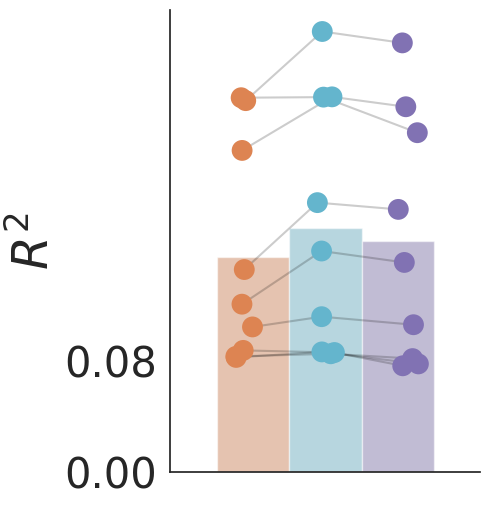

<Figure size 640x480 with 0 Axes>

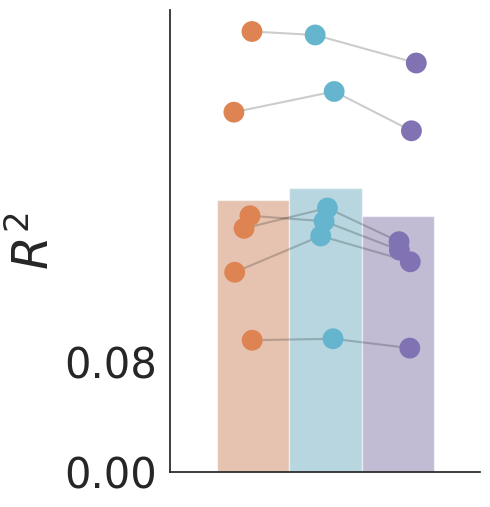

PEARSON R LAST TOKEN


In [43]:
_, _, _ = plot_across_subjects(modified_384.copy(), figurePath=figurePath, selected_networks=['language'],
                                             saveName=None, hue_order=['SP+SL+WORD', f'SP+SL+WORD+{model_name_upper}', model_name_upper], 
                                             yticks=[0,0.08], order=['language'], clip_zero=clip_zero, color_palette=[default_palette[1], default_palette[9], default_palette[4]], 
                                             draw_lines=True, ms=15, plot_legend=False, 
                                             plot_legend_under=False, width=0.7, median=True)
_, _, _ = plot_across_subjects(modified_243.copy(), figurePath=figurePath, selected_networks=['language'],
                                             saveName=None, hue_order=['SP+SL+WORD', f'SP+SL+WORD+{model_name_upper}', model_name_upper], 
                                             yticks=[0,0.08], order=['language'], clip_zero=clip_zero, color_palette=[default_palette[1], default_palette[9], default_palette[4]], 
                                             draw_lines=True, ms=15, plot_legend=False, 
                                             plot_legend_under=False, width=0.7, median=True)

print("PEARSON R LAST TOKEN")